In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6008,BD Provider App,HEALTH_AND_FITNESS,1.4,45,13M,"5,000+",Free,0,Everyone,Health & Fitness,"September 12, 2016",1.0,4.1 and up
8530,Trimble DL,PRODUCTIVITY,4.2,133,7.9M,"10,000+",Free,0,Everyone,Productivity,"January 12, 2018",1.0.184,4.2 and up
720,Learn English Words Free,EDUCATION,4.6,172640,14M,"5,000,000+",Free,0,Everyone,Education,"May 2, 2018",2.6.2,4.1 and up
4486,Android P Launcher 9.0 launcher,TOOLS,4.0,164,2.3M,"10,000+",Free,0,Everyone,Tools,"April 23, 2018",1.0,5.0 and up
793,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107884,Varies with device,"10,000,000+",Free,0,Everyone,Education,"August 2, 2018",Varies with device,Varies with device


In [4]:
df=df.drop(df.index[10472])

In [5]:
df["Reviews"] = df["Reviews"].astype(int)

In [6]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [7]:
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [8]:
remover_items=['+',',','$']
columnas=['Installs','Price']
for item in remover_items:
    for col in columnas:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [10]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [11]:
df.drop('Last Updated', axis=1, inplace=True)

In [12]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


<BarContainer object of 14 artists>

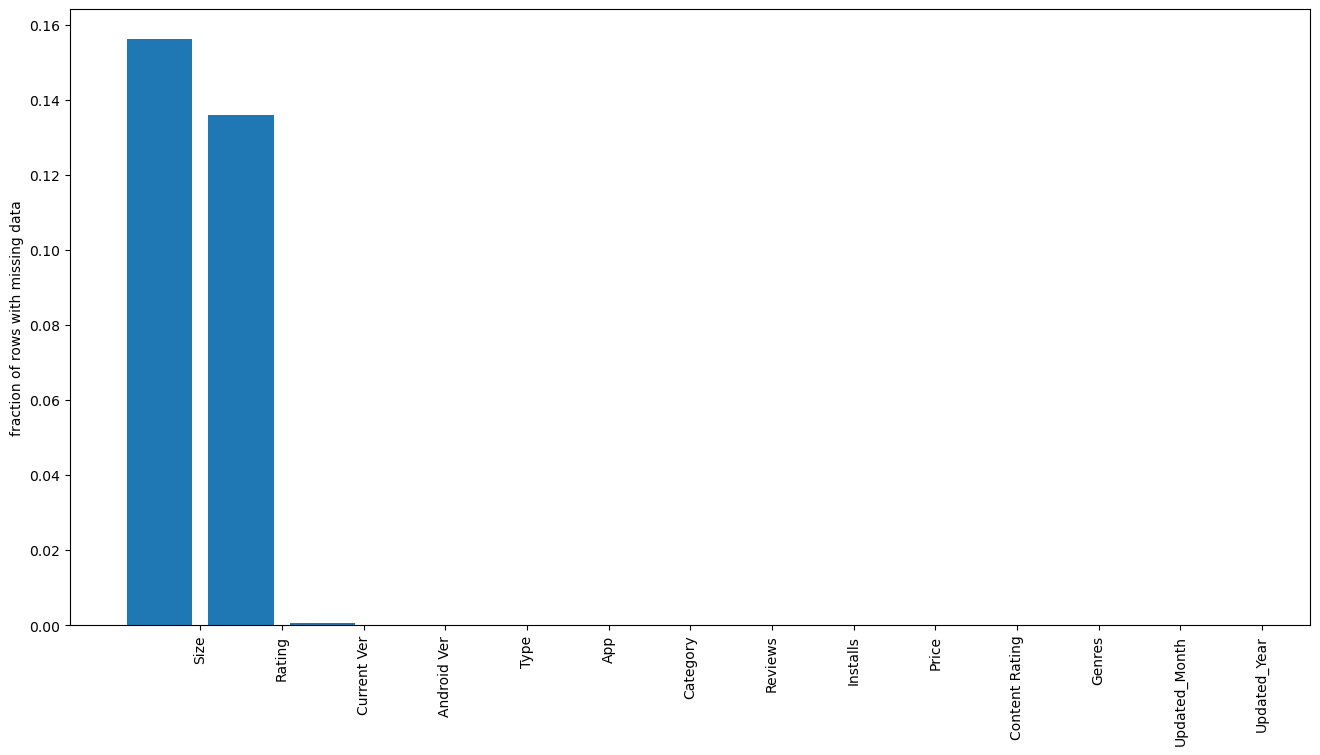

In [13]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [14]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

In [15]:
def impute_median(series):
    return series.fillna(series.median())

df['Size'] = df['Size'].transform(impute_median)

In [16]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [17]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [20]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [21]:
target = 'Rating'

In [22]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from collections import defaultdict
le_dict = defaultdict()

In [25]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Ajuste y transformación de los datos de entrenamiento
    X_train[col] = X_train[col].astype('category') # Conversión de las características codificadas en etiquetas de tipo numérico a categórico en pandas
    X_test[col] = le.transform(X_test[col]) # Transformar sólo los datos de prueba
    X_test[col] = X_test[col].astype('category') # Convertir las características codificadas en etiquetas de numéricas a categóricas dtype in pandas
    le_dict[col] = le # Guardar el codificador de etiquetas para características individuales

In [26]:
# Conversión y adición de «Last Updated Month» a características categóricas
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listado de características numéricas a escala
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [27]:
# Check the data type of y_train
print(y_train.dtype)
print(y_train[:10])  # Print the first 10 values to inspect

# If y_train is continuous, binarize or categorize it
if y_train.dtype in ['float64', 'float32', 'int64', 'int32']:
    # Example: convert continuous target to binary (0 or 1)
    # This is just an example; you need to define how you want to categorize your target
    y_train = (y_train > y_train.mean()).astype(int)
    y_test = (y_test > y_test.mean()).astype(int)

# Train the model again
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

float64
1948    4.3
1201    4.3
4700    4.2
9156    4.4
3632    4.5
876     4.5
1301    4.0
4565    4.3
9462    4.3
5009    3.9
Name: Rating, dtype: float64
Accuracy: 0.71
Recall: 0.79
Precision: 0.75
F1 Score: 0.77
ROC AUC Score: 0.69


## Explicación de las Métricas de Evaluación y sus Resultados
### Accuracy (Precisión):

* Definición: Es el porcentaje de predicciones correctas sobre el total de predicciones realizadas.

$$
\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}
$$

* Donde:
    - TP: Verdaderos Positivos
    - TN: Verdaderos Negativos
    - FP: Falsos Positivos
    - FN: Falsos Negativos
* Resultado: 0.71 (71%)
* **Interpretación**: El modelo predice correctamente el 71% de los casos. Esta es una métrica global que no distingue entre las clases y puede ser engañosa si las clases están desbalanceadas.

### Recall (Sensibilidad o Tasa de Verdaderos Positivos):

* Definición: Es la proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
$$
\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
$$
* Resultado: 0.79 (79%)
* **Interpretación**: El modelo identifica correctamente el 79% de los casos positivos reales. Es crucial en escenarios donde los falsos negativos son costosos, como en detección de enfermedades.
### Precision (Precisión Positiva):

* Definición: Es la proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos positivos.
$$
\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
$$
* Resultado: 0.75 (75%)
* **Interpretación**: El 75% de las predicciones positivas son correctas. Es crucial en escenarios donde los falsos positivos son costosos, como en sistemas de spam.
### F1 Score:

* Definición: Es la media armónica entre precisión y recall, proporcionando un balance entre ambas métricas.
$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}
$$
* Resultado: 0.77 (77%)
* **Interpretación**: Este valor de 0.77 indica un buen balance entre precisión y recall. Es útil cuando se necesita un equilibrio entre ambas métricas.
### ROC AUC Score (Área Bajo la Curva ROC):

* Definición: Es una métrica que evalúa la capacidad del modelo para distinguir entre las clases. La curva ROC (Receiver Operating Characteristic) es una gráfica de la tasa de verdaderos positivos frente a la tasa de falsos positivos a diferentes umbrales.
* Cálculo: Se calcula el área bajo la curva ROC.
$$
\text{AUC} = \int_{\text{ROC}} \text{d(ROC)}
$$
* Resultado: 0.69 (69%)
* **Interpretación**: Un valor de 0.69 indica que el modelo tiene una capacidad moderada para distinguir entre clases positivas y negativas. Un valor de 0.5 representa un modelo que no tiene discriminación (aleatorio), mientras que un valor de 1.0 representa una perfecta discriminación.
### Conclusión
* Accuracy: 0.71 indica un buen rendimiento general, pero puede ser menos informativo si las clases están desbalanceadas.
* Recall: 0.79 es alto, lo que es bueno para capturar la mayoría de los casos positivos.
* Precision: 0.75 muestra que la mayoría de las predicciones positivas son correctas, aunque hay un 25% de falsos positivos.
* F1 Score: 0.77 sugiere un buen equilibrio entre precisión y recall.
* ROC AUC Score: 0.69 indica una capacidad moderada para distinguir entre las clases.